In [321]:
import pandas as pd
import matplotlib.pyplot as plt

In [322]:
dataset = pd.read_pickle('openPoseDataset.pkl')

In [323]:
data = pd.DataFrame(dataset)

In [324]:
data0 = data[data[55]==0]
data1 = data[data[55]==1]

In [325]:
a = data0/len(data0) 
b = data1/len(data1) 

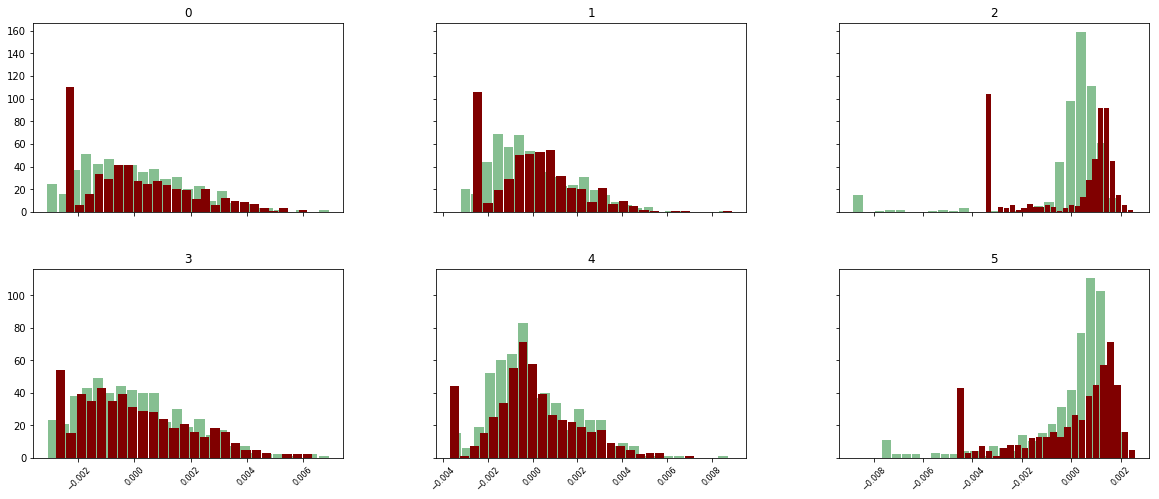

In [326]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(20, 8))
col=0
for i in range(2):
    for j in range(3):
        a.hist(column=col, bins=25, ax=ax[i,j], grid=False, color='#86bf91', zorder=2, rwidth=0.9,xlabelsize=8,xrot=90)
        b.hist(column=col, bins=25, ax=ax[i,j], grid=False, color='#800000', zorder=2, rwidth=0.9,xlabelsize=8,xrot=45)
        ax[i,j].set_visible(True)
        col+=1
    

In [327]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
d = data.iloc[:,:7] 
d_lab = data.iloc[:,55]

In [330]:
D = pd.concat([d,d_lab],axis=1)

In [331]:
d_final = D.rename(columns={55:'label'})

/Users/ninatubau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ninatubau/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ninatubau/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ninatubau/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, ou

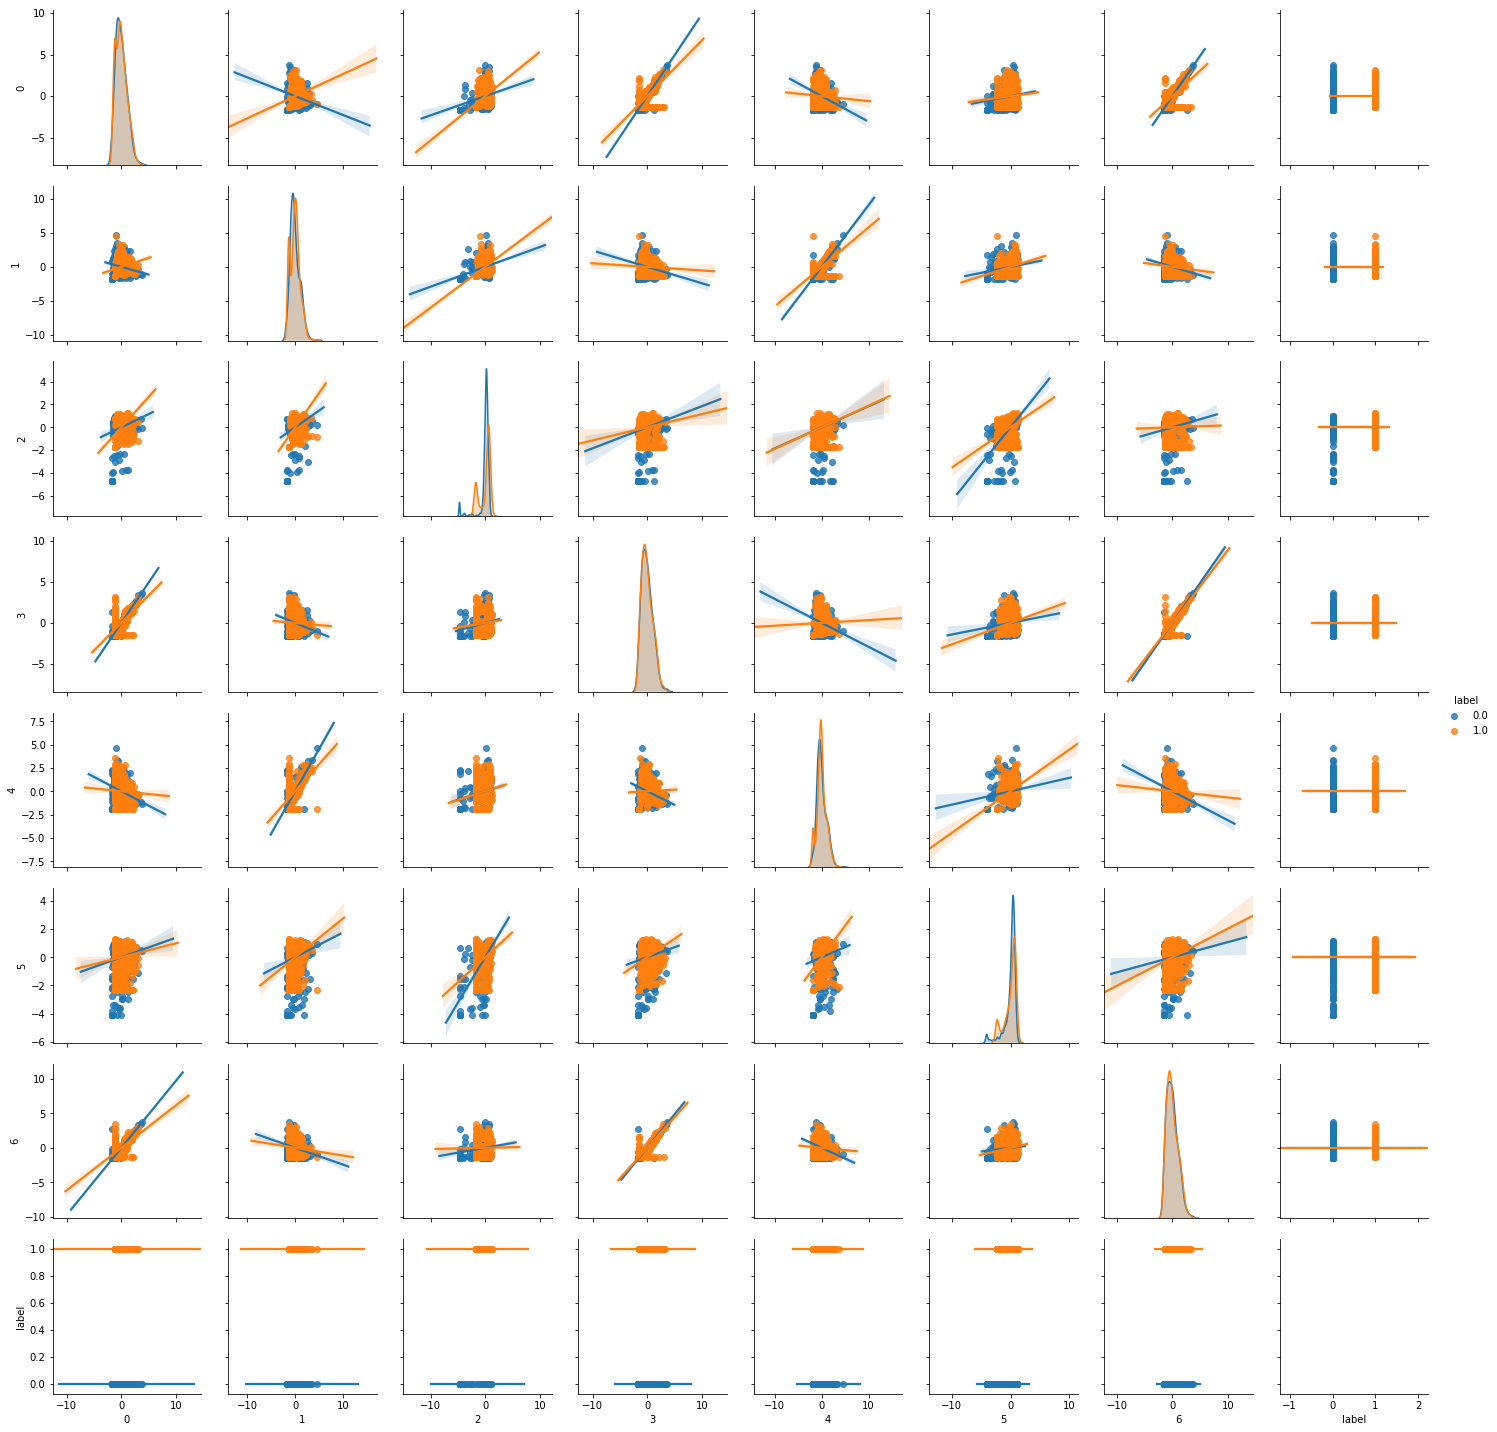

In [332]:
sns.pairplot(d_final, hue='label', kind='reg')


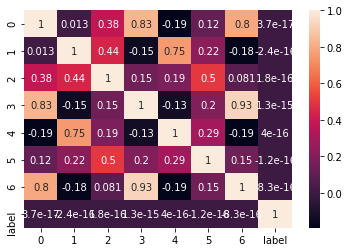

In [333]:
sns.heatmap(d_final.corr(), annot=True)

In [334]:
classifier=[]

In [335]:
data = data.sample(frac=1)

In [337]:
# creating input features and target variables
X= data.iloc[:,:54]
y= data.iloc[:,55]

In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [339]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.constraints import unit_norm
from sklearn.metrics import accuracy_score

In [340]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(12, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu',kernel_constraint=unit_norm(), kernel_initializer='random_normal', input_dim=54))
classifier.add(Dropout(0.2))
#Second  Hidden Layer
classifier.add(Dense(12, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=500)

Train on 484 samples, validate on 239 samples
Epoch 1/500
484/484 [==============================] - 2s 4ms/step - loss: 0.8137 - acc: 0.5021 - val_loss: 0.8142 - val_acc: 0.5607
Epoch 2/500
484/484 [==============================] - 0s 272us/step - loss: 0.8142 - acc: 0.5186 - val_loss: 0.8135 - val_acc: 0.5397
Epoch 3/500
484/484 [==============================] - 0s 278us/step - loss: 0.8135 - acc: 0.5331 - val_loss: 0.8131 - val_acc: 0.5188
Epoch 4/500
484/484 [==============================] - 0s 283us/step - loss: 0.8128 - acc: 0.5310 - val_loss: 0.8129 - val_acc: 0.5146
Epoch 5/500
484/484 [==============================] - 0s 233us/step - loss: 0.8125 - acc: 0.5186 - val_loss: 0.8122 - val_acc: 0.5146
Epoch 6/500
484/484 [==============================] - 0s 288us/step - loss: 0.8116 - acc: 0.5537 - val_loss: 0.8113 - val_acc: 0.5690
Epoch 7/500
484/484 [==============================] - 0s 227us/step - loss: 0.8102 - acc: 0.5579 - val_loss: 0.8101 - val_acc: 0.5649
Epoch 8/500

Epoch 61/500
484/484 [==============================] - 0s 248us/step - loss: 0.3358 - acc: 0.9463 - val_loss: 0.4393 - val_acc: 0.9372
Epoch 62/500
484/484 [==============================] - 0s 237us/step - loss: 0.3608 - acc: 0.9442 - val_loss: 0.4388 - val_acc: 0.9414
Epoch 63/500
484/484 [==============================] - 0s 233us/step - loss: 0.3312 - acc: 0.9607 - val_loss: 0.4503 - val_acc: 0.9289
Epoch 64/500
484/484 [==============================] - 0s 235us/step - loss: 0.3822 - acc: 0.9277 - val_loss: 0.4380 - val_acc: 0.9205
Epoch 65/500
484/484 [==============================] - 0s 299us/step - loss: 0.3343 - acc: 0.9587 - val_loss: 0.4517 - val_acc: 0.9414
Epoch 66/500
484/484 [==============================] - 0s 297us/step - loss: 0.3410 - acc: 0.9525 - val_loss: 0.4334 - val_acc: 0.9205
Epoch 67/500
484/484 [==============================] - 0s 224us/step - loss: 0.3233 - acc: 0.9545 - val_loss: 0.4264 - val_acc: 0.9331
Epoch 68/500
484/484 [==========================

484/484 [==============================] - 0s 323us/step - loss: 0.2780 - acc: 0.9669 - val_loss: 0.4212 - val_acc: 0.9498
Epoch 122/500
484/484 [==============================] - 0s 307us/step - loss: 0.2662 - acc: 0.9690 - val_loss: 0.4404 - val_acc: 0.9498
Epoch 123/500
484/484 [==============================] - 0s 306us/step - loss: 0.2884 - acc: 0.9649 - val_loss: 0.4353 - val_acc: 0.9289
Epoch 124/500
484/484 [==============================] - 0s 308us/step - loss: 0.2723 - acc: 0.9690 - val_loss: 0.4348 - val_acc: 0.9540
Epoch 125/500
484/484 [==============================] - 0s 265us/step - loss: 0.2677 - acc: 0.9731 - val_loss: 0.4487 - val_acc: 0.9456
Epoch 126/500
484/484 [==============================] - 0s 275us/step - loss: 0.2653 - acc: 0.9711 - val_loss: 0.4564 - val_acc: 0.9372
Epoch 127/500
484/484 [==============================] - 0s 283us/step - loss: 0.2846 - acc: 0.9690 - val_loss: 0.4313 - val_acc: 0.9331
Epoch 128/500
484/484 [==============================] 

Epoch 181/500
484/484 [==============================] - 0s 329us/step - loss: 0.2213 - acc: 0.9835 - val_loss: 0.4303 - val_acc: 0.9372
Epoch 182/500
484/484 [==============================] - 0s 266us/step - loss: 0.2303 - acc: 0.9835 - val_loss: 0.4447 - val_acc: 0.9498
Epoch 183/500
484/484 [==============================] - 0s 240us/step - loss: 0.2503 - acc: 0.9711 - val_loss: 0.4433 - val_acc: 0.9289
Epoch 184/500
484/484 [==============================] - 0s 302us/step - loss: 0.2301 - acc: 0.9793 - val_loss: 0.4352 - val_acc: 0.9456
Epoch 185/500
484/484 [==============================] - 0s 250us/step - loss: 0.2193 - acc: 0.9897 - val_loss: 0.4310 - val_acc: 0.9456
Epoch 186/500
484/484 [==============================] - 0s 244us/step - loss: 0.2256 - acc: 0.9855 - val_loss: 0.4243 - val_acc: 0.9498
Epoch 187/500
484/484 [==============================] - 0s 284us/step - loss: 0.2303 - acc: 0.9773 - val_loss: 0.4539 - val_acc: 0.9372
Epoch 188/500
484/484 [==================

Epoch 241/500
484/484 [==============================] - 0s 227us/step - loss: 0.2226 - acc: 0.9814 - val_loss: 0.4322 - val_acc: 0.9414
Epoch 242/500
484/484 [==============================] - 0s 215us/step - loss: 0.2104 - acc: 0.9855 - val_loss: 0.4323 - val_acc: 0.9456
Epoch 243/500
484/484 [==============================] - 0s 220us/step - loss: 0.2055 - acc: 0.9917 - val_loss: 0.4377 - val_acc: 0.9414
Epoch 244/500
484/484 [==============================] - 0s 207us/step - loss: 0.2337 - acc: 0.9731 - val_loss: 0.4374 - val_acc: 0.9372
Epoch 245/500
484/484 [==============================] - 0s 214us/step - loss: 0.2146 - acc: 0.9814 - val_loss: 0.4364 - val_acc: 0.9498
Epoch 246/500
484/484 [==============================] - 0s 221us/step - loss: 0.1892 - acc: 0.9917 - val_loss: 0.4399 - val_acc: 0.9498
Epoch 247/500
484/484 [==============================] - 0s 223us/step - loss: 0.2355 - acc: 0.9690 - val_loss: 0.4255 - val_acc: 0.9498
Epoch 248/500
484/484 [==================

Epoch 301/500
484/484 [==============================] - 0s 222us/step - loss: 0.2100 - acc: 0.9855 - val_loss: 0.4334 - val_acc: 0.9540
Epoch 302/500
484/484 [==============================] - 0s 220us/step - loss: 0.2008 - acc: 0.9876 - val_loss: 0.4316 - val_acc: 0.9540
Epoch 303/500
484/484 [==============================] - 0s 225us/step - loss: 0.2141 - acc: 0.9897 - val_loss: 0.4278 - val_acc: 0.9456
Epoch 304/500
484/484 [==============================] - 0s 208us/step - loss: 0.2153 - acc: 0.9793 - val_loss: 0.4292 - val_acc: 0.9540
Epoch 305/500
484/484 [==============================] - 0s 228us/step - loss: 0.2093 - acc: 0.9835 - val_loss: 0.4383 - val_acc: 0.9414
Epoch 306/500
484/484 [==============================] - 0s 217us/step - loss: 0.2101 - acc: 0.9855 - val_loss: 0.4625 - val_acc: 0.9456
Epoch 307/500
484/484 [==============================] - 0s 208us/step - loss: 0.2117 - acc: 0.9835 - val_loss: 0.4616 - val_acc: 0.9456
Epoch 308/500
484/484 [==================

Epoch 361/500
484/484 [==============================] - 0s 282us/step - loss: 0.1895 - acc: 0.9897 - val_loss: 0.4152 - val_acc: 0.9498
Epoch 362/500
484/484 [==============================] - 0s 305us/step - loss: 0.2175 - acc: 0.9793 - val_loss: 0.4145 - val_acc: 0.9498
Epoch 363/500
484/484 [==============================] - 0s 287us/step - loss: 0.2061 - acc: 0.9752 - val_loss: 0.4249 - val_acc: 0.9498
Epoch 364/500
484/484 [==============================] - 0s 293us/step - loss: 0.2108 - acc: 0.9855 - val_loss: 0.4193 - val_acc: 0.9498
Epoch 365/500
484/484 [==============================] - 0s 311us/step - loss: 0.2113 - acc: 0.9855 - val_loss: 0.4161 - val_acc: 0.9540
Epoch 366/500
484/484 [==============================] - 0s 285us/step - loss: 0.2043 - acc: 0.9814 - val_loss: 0.4335 - val_acc: 0.9623
Epoch 367/500
484/484 [==============================] - 0s 297us/step - loss: 0.1980 - acc: 0.9876 - val_loss: 0.4357 - val_acc: 0.9582
Epoch 368/500
484/484 [==================

484/484 [==============================] - 0s 275us/step - loss: 0.1819 - acc: 0.9959 - val_loss: 0.4692 - val_acc: 0.9498
Epoch 421/500
484/484 [==============================] - 0s 237us/step - loss: 0.1979 - acc: 0.9814 - val_loss: 0.4671 - val_acc: 0.9540
Epoch 422/500
484/484 [==============================] - 0s 234us/step - loss: 0.2193 - acc: 0.9752 - val_loss: 0.4977 - val_acc: 0.9456
Epoch 423/500
484/484 [==============================] - 0s 250us/step - loss: 0.1891 - acc: 0.9876 - val_loss: 0.4625 - val_acc: 0.9414
Epoch 424/500
484/484 [==============================] - 0s 248us/step - loss: 0.1981 - acc: 0.9814 - val_loss: 0.4393 - val_acc: 0.9414
Epoch 425/500
484/484 [==============================] - 0s 261us/step - loss: 0.2292 - acc: 0.9835 - val_loss: 0.4662 - val_acc: 0.9623
Epoch 426/500
484/484 [==============================] - 0s 286us/step - loss: 0.2042 - acc: 0.9814 - val_loss: 0.4328 - val_acc: 0.9456
Epoch 427/500
484/484 [==============================] 

Epoch 480/500
484/484 [==============================] - 0s 291us/step - loss: 0.1944 - acc: 0.9855 - val_loss: 0.4521 - val_acc: 0.9498
Epoch 481/500
484/484 [==============================] - 0s 246us/step - loss: 0.2066 - acc: 0.9773 - val_loss: 0.4217 - val_acc: 0.9456
Epoch 482/500
484/484 [==============================] - 0s 259us/step - loss: 0.2019 - acc: 0.9773 - val_loss: 0.4668 - val_acc: 0.9498
Epoch 483/500
484/484 [==============================] - 0s 257us/step - loss: 0.1823 - acc: 0.9897 - val_loss: 0.4293 - val_acc: 0.9456
Epoch 484/500
484/484 [==============================] - 0s 276us/step - loss: 0.1772 - acc: 0.9876 - val_loss: 0.4799 - val_acc: 0.9456
Epoch 485/500
484/484 [==============================] - 0s 307us/step - loss: 0.2057 - acc: 0.9773 - val_loss: 0.4267 - val_acc: 0.9498
Epoch 486/500
484/484 [==============================] - 0s 296us/step - loss: 0.2067 - acc: 0.9731 - val_loss: 0.4276 - val_acc: 0.9582
Epoch 487/500
484/484 [==================

In [347]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()

for param in values:
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(12, kernel_regularizer=l2(param), bias_regularizer=l2(param),activation='relu',kernel_constraint=unit_norm(), kernel_initializer='random_normal',input_dim=54))
    classifier.add(Dropout(0.2))
    #Second  Hidden Layer
    classifier.add(Dense(12,kernel_regularizer=l2(param), bias_regularizer=l2(param), activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dropout(0.2))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    #Fitting the data to the training dataset
    history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=200)
    _, train_acc = classifier.evaluate(X_train, y_train, verbose=0)
    _, test_acc = classifier.evaluate(X_test, y_test, verbose=0)
    all_train.append(train_acc)
    all_test.append(test_acc)

Train on 484 samples, validate on 239 samples
Epoch 1/200
484/484 [==============================] - 2s 4ms/step - loss: 1.8914 - acc: 0.4504 - val_loss: 1.9004 - val_acc: 0.5397
Epoch 2/200
484/484 [==============================] - 0s 244us/step - loss: 1.8971 - acc: 0.4979 - val_loss: 1.8945 - val_acc: 0.5356
Epoch 3/200
484/484 [==============================] - 0s 261us/step - loss: 1.8939 - acc: 0.5186 - val_loss: 1.8932 - val_acc: 0.5146
Epoch 4/200
484/484 [==============================] - 0s 277us/step - loss: 1.8932 - acc: 0.5145 - val_loss: 1.8929 - val_acc: 0.5146
Epoch 5/200
484/484 [==============================] - 0s 257us/step - loss: 1.8930 - acc: 0.5165 - val_loss: 1.8929 - val_acc: 0.5146
Epoch 6/200
484/484 [==============================] - 0s 238us/step - loss: 1.8930 - acc: 0.5165 - val_loss: 1.8929 - val_acc: 0.5146
Epoch 7/200
484/484 [==============================] - 0s 262us/step - loss: 1.8928 - acc: 0.5165 - val_loss: 1.8928 - val_acc: 0.5146
Epoch 8/200

Epoch 61/200
484/484 [==============================] - 0s 251us/step - loss: 1.8891 - acc: 0.6033 - val_loss: 1.8894 - val_acc: 0.6192
Epoch 62/200
484/484 [==============================] - 0s 236us/step - loss: 1.8866 - acc: 0.6322 - val_loss: 1.8888 - val_acc: 0.6234
Epoch 63/200
484/484 [==============================] - 0s 221us/step - loss: 1.8841 - acc: 0.6405 - val_loss: 1.8872 - val_acc: 0.6527
Epoch 64/200
484/484 [==============================] - 0s 216us/step - loss: 1.8830 - acc: 0.6198 - val_loss: 1.8863 - val_acc: 0.6318
Epoch 65/200
484/484 [==============================] - 0s 234us/step - loss: 1.8843 - acc: 0.6178 - val_loss: 1.8848 - val_acc: 0.6653
Epoch 66/200
484/484 [==============================] - 0s 232us/step - loss: 1.8818 - acc: 0.6343 - val_loss: 1.8852 - val_acc: 0.6151
Epoch 67/200
484/484 [==============================] - 0s 220us/step - loss: 1.8841 - acc: 0.6364 - val_loss: 1.8820 - val_acc: 0.6611
Epoch 68/200
484/484 [==========================

484/484 [==============================] - 0s 309us/step - loss: 1.7872 - acc: 0.7397 - val_loss: 1.8006 - val_acc: 0.7322
Epoch 122/200
484/484 [==============================] - 0s 205us/step - loss: 1.8005 - acc: 0.7355 - val_loss: 1.7996 - val_acc: 0.7531
Epoch 123/200
484/484 [==============================] - 0s 215us/step - loss: 1.7859 - acc: 0.7479 - val_loss: 1.8005 - val_acc: 0.7615
Epoch 124/200
484/484 [==============================] - 0s 233us/step - loss: 1.7879 - acc: 0.7500 - val_loss: 1.7947 - val_acc: 0.7490
Epoch 125/200
484/484 [==============================] - 0s 226us/step - loss: 1.7863 - acc: 0.7541 - val_loss: 1.7928 - val_acc: 0.7573
Epoch 126/200
484/484 [==============================] - 0s 267us/step - loss: 1.7762 - acc: 0.7727 - val_loss: 1.7894 - val_acc: 0.7531
Epoch 127/200
484/484 [==============================] - 0s 225us/step - loss: 1.7930 - acc: 0.7149 - val_loss: 1.7922 - val_acc: 0.7448
Epoch 128/200
484/484 [==============================] 

Epoch 181/200
484/484 [==============================] - 0s 224us/step - loss: 1.6992 - acc: 0.7975 - val_loss: 1.6970 - val_acc: 0.8201
Epoch 182/200
484/484 [==============================] - 0s 218us/step - loss: 1.7090 - acc: 0.8140 - val_loss: 1.7280 - val_acc: 0.8075
Epoch 183/200
484/484 [==============================] - 0s 210us/step - loss: 1.7005 - acc: 0.8079 - val_loss: 1.7030 - val_acc: 0.8243
Epoch 184/200
484/484 [==============================] - 0s 210us/step - loss: 1.6691 - acc: 0.8430 - val_loss: 1.7007 - val_acc: 0.8159
Epoch 185/200
484/484 [==============================] - 0s 211us/step - loss: 1.6744 - acc: 0.8409 - val_loss: 1.6909 - val_acc: 0.8494
Epoch 186/200
484/484 [==============================] - 0s 203us/step - loss: 1.6897 - acc: 0.8326 - val_loss: 1.6870 - val_acc: 0.8452
Epoch 187/200
484/484 [==============================] - 0s 207us/step - loss: 1.6842 - acc: 0.8140 - val_loss: 1.6930 - val_acc: 0.8536
Epoch 188/200
484/484 [==================

Epoch 41/200
484/484 [==============================] - 0s 347us/step - loss: 0.4540 - acc: 0.8988 - val_loss: 0.5222 - val_acc: 0.9038
Epoch 42/200
484/484 [==============================] - 0s 350us/step - loss: 0.4318 - acc: 0.9050 - val_loss: 0.5055 - val_acc: 0.8954
Epoch 43/200
484/484 [==============================] - 0s 297us/step - loss: 0.4521 - acc: 0.8905 - val_loss: 0.5025 - val_acc: 0.9079
Epoch 44/200
484/484 [==============================] - 0s 404us/step - loss: 0.4669 - acc: 0.8946 - val_loss: 0.5087 - val_acc: 0.9079
Epoch 45/200
484/484 [==============================] - 0s 470us/step - loss: 0.4000 - acc: 0.9421 - val_loss: 0.4897 - val_acc: 0.9121
Epoch 46/200
484/484 [==============================] - 0s 335us/step - loss: 0.4365 - acc: 0.8967 - val_loss: 0.4929 - val_acc: 0.9121
Epoch 47/200
484/484 [==============================] - 0s 351us/step - loss: 0.4108 - acc: 0.9215 - val_loss: 0.4919 - val_acc: 0.9079
Epoch 48/200
484/484 [==========================

484/484 [==============================] - 0s 278us/step - loss: 0.2982 - acc: 0.9566 - val_loss: 0.4764 - val_acc: 0.9372
Epoch 102/200
484/484 [==============================] - 0s 241us/step - loss: 0.2998 - acc: 0.9607 - val_loss: 0.4629 - val_acc: 0.9372
Epoch 103/200
484/484 [==============================] - 0s 239us/step - loss: 0.3032 - acc: 0.9545 - val_loss: 0.4708 - val_acc: 0.9372
Epoch 104/200
484/484 [==============================] - 0s 242us/step - loss: 0.2806 - acc: 0.9669 - val_loss: 0.4579 - val_acc: 0.9372
Epoch 105/200
484/484 [==============================] - 0s 211us/step - loss: 0.3026 - acc: 0.9587 - val_loss: 0.4536 - val_acc: 0.9414
Epoch 106/200
484/484 [==============================] - 0s 222us/step - loss: 0.3056 - acc: 0.9545 - val_loss: 0.4538 - val_acc: 0.9372
Epoch 107/200
484/484 [==============================] - 0s 218us/step - loss: 0.2785 - acc: 0.9731 - val_loss: 0.4665 - val_acc: 0.9414
Epoch 108/200
484/484 [==============================] 

Epoch 161/200
484/484 [==============================] - 0s 365us/step - loss: 0.2616 - acc: 0.9669 - val_loss: 0.4445 - val_acc: 0.9456
Epoch 162/200
484/484 [==============================] - 0s 304us/step - loss: 0.2439 - acc: 0.9731 - val_loss: 0.4447 - val_acc: 0.9456
Epoch 163/200
484/484 [==============================] - 0s 285us/step - loss: 0.2400 - acc: 0.9773 - val_loss: 0.4516 - val_acc: 0.9498
Epoch 164/200
484/484 [==============================] - 0s 238us/step - loss: 0.2328 - acc: 0.9793 - val_loss: 0.4496 - val_acc: 0.9540
Epoch 165/200
484/484 [==============================] - 0s 242us/step - loss: 0.2498 - acc: 0.9711 - val_loss: 0.4687 - val_acc: 0.9414
Epoch 166/200
484/484 [==============================] - 0s 286us/step - loss: 0.2320 - acc: 0.9814 - val_loss: 0.4424 - val_acc: 0.9498
Epoch 167/200
484/484 [==============================] - 0s 249us/step - loss: 0.2635 - acc: 0.9649 - val_loss: 0.4275 - val_acc: 0.9540
Epoch 168/200
484/484 [==================

Epoch 21/200
484/484 [==============================] - 0s 232us/step - loss: 0.3998 - acc: 0.8574 - val_loss: 0.3823 - val_acc: 0.8996
Epoch 22/200
484/484 [==============================] - 0s 239us/step - loss: 0.3933 - acc: 0.8574 - val_loss: 0.3722 - val_acc: 0.8954
Epoch 23/200
484/484 [==============================] - 0s 244us/step - loss: 0.3657 - acc: 0.8657 - val_loss: 0.3803 - val_acc: 0.8828
Epoch 24/200
484/484 [==============================] - 0s 398us/step - loss: 0.3543 - acc: 0.8740 - val_loss: 0.3703 - val_acc: 0.8828
Epoch 25/200
484/484 [==============================] - 0s 295us/step - loss: 0.3545 - acc: 0.8678 - val_loss: 0.3539 - val_acc: 0.9121
Epoch 26/200
484/484 [==============================] - 0s 238us/step - loss: 0.3244 - acc: 0.9008 - val_loss: 0.3460 - val_acc: 0.8912
Epoch 27/200
484/484 [==============================] - 0s 234us/step - loss: 0.3366 - acc: 0.8822 - val_loss: 0.3419 - val_acc: 0.9079
Epoch 28/200
484/484 [==========================

484/484 [==============================] - 0s 231us/step - loss: 0.1233 - acc: 0.9814 - val_loss: 0.3053 - val_acc: 0.9456
Epoch 82/200
484/484 [==============================] - 0s 215us/step - loss: 0.1106 - acc: 0.9855 - val_loss: 0.2902 - val_acc: 0.9540
Epoch 83/200
484/484 [==============================] - 0s 220us/step - loss: 0.1188 - acc: 0.9835 - val_loss: 0.3027 - val_acc: 0.9456
Epoch 84/200
484/484 [==============================] - 0s 226us/step - loss: 0.1390 - acc: 0.9649 - val_loss: 0.2947 - val_acc: 0.9456
Epoch 85/200
484/484 [==============================] - 0s 223us/step - loss: 0.1070 - acc: 0.9855 - val_loss: 0.3034 - val_acc: 0.9372
Epoch 86/200
484/484 [==============================] - 0s 210us/step - loss: 0.1178 - acc: 0.9752 - val_loss: 0.3110 - val_acc: 0.9498
Epoch 87/200
484/484 [==============================] - 0s 224us/step - loss: 0.1359 - acc: 0.9649 - val_loss: 0.3280 - val_acc: 0.9456
Epoch 88/200
484/484 [==============================] - 0s 21

484/484 [==============================] - 0s 228us/step - loss: 0.1231 - acc: 0.9731 - val_loss: 0.3651 - val_acc: 0.9498
Epoch 142/200
484/484 [==============================] - 0s 221us/step - loss: 0.1017 - acc: 0.9793 - val_loss: 0.3987 - val_acc: 0.9414
Epoch 143/200
484/484 [==============================] - 0s 215us/step - loss: 0.1172 - acc: 0.9690 - val_loss: 0.3620 - val_acc: 0.9582
Epoch 144/200
484/484 [==============================] - 0s 271us/step - loss: 0.0986 - acc: 0.9793 - val_loss: 0.3519 - val_acc: 0.9456
Epoch 145/200
484/484 [==============================] - 0s 344us/step - loss: 0.0767 - acc: 0.9876 - val_loss: 0.3533 - val_acc: 0.9540
Epoch 146/200
484/484 [==============================] - 0s 312us/step - loss: 0.0893 - acc: 0.9855 - val_loss: 0.3703 - val_acc: 0.9540
Epoch 147/200
484/484 [==============================] - 0s 239us/step - loss: 0.1018 - acc: 0.9731 - val_loss: 0.3620 - val_acc: 0.9582
Epoch 148/200
484/484 [==============================] 

Train on 484 samples, validate on 239 samples
Epoch 1/200
484/484 [==============================] - 3s 6ms/step - loss: 0.6942 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5732
Epoch 2/200
484/484 [==============================] - 0s 286us/step - loss: 0.6935 - acc: 0.5227 - val_loss: 0.6922 - val_acc: 0.5523
Epoch 3/200
484/484 [==============================] - 0s 244us/step - loss: 0.6924 - acc: 0.5289 - val_loss: 0.6902 - val_acc: 0.5732
Epoch 4/200
484/484 [==============================] - 0s 247us/step - loss: 0.6901 - acc: 0.5992 - val_loss: 0.6862 - val_acc: 0.5816
Epoch 5/200
484/484 [==============================] - 0s 248us/step - loss: 0.6862 - acc: 0.5806 - val_loss: 0.6790 - val_acc: 0.6569
Epoch 6/200
484/484 [==============================] - 0s 281us/step - loss: 0.6747 - acc: 0.6508 - val_loss: 0.6661 - val_acc: 0.6946
Epoch 7/200
484/484 [==============================] - 0s 305us/step - loss: 0.6660 - acc: 0.6426 - val_loss: 0.6459 - val_acc: 0.7280
Epoch 8/200

Epoch 61/200
484/484 [==============================] - 0s 363us/step - loss: 0.1739 - acc: 0.9401 - val_loss: 0.2359 - val_acc: 0.9414
Epoch 62/200
484/484 [==============================] - 0s 307us/step - loss: 0.1688 - acc: 0.9463 - val_loss: 0.2402 - val_acc: 0.9498
Epoch 63/200
484/484 [==============================] - 0s 238us/step - loss: 0.1644 - acc: 0.9483 - val_loss: 0.2273 - val_acc: 0.9456
Epoch 64/200
484/484 [==============================] - 0s 255us/step - loss: 0.1733 - acc: 0.9421 - val_loss: 0.2383 - val_acc: 0.9498
Epoch 65/200
484/484 [==============================] - 0s 248us/step - loss: 0.1638 - acc: 0.9525 - val_loss: 0.2307 - val_acc: 0.9498
Epoch 66/200
484/484 [==============================] - 0s 276us/step - loss: 0.1589 - acc: 0.9504 - val_loss: 0.2369 - val_acc: 0.9498
Epoch 67/200
484/484 [==============================] - 0s 306us/step - loss: 0.1643 - acc: 0.9442 - val_loss: 0.2280 - val_acc: 0.9456
Epoch 68/200
484/484 [==========================

484/484 [==============================] - 0s 222us/step - loss: 0.0997 - acc: 0.9587 - val_loss: 0.2617 - val_acc: 0.9540
Epoch 122/200
484/484 [==============================] - 0s 216us/step - loss: 0.0771 - acc: 0.9731 - val_loss: 0.2664 - val_acc: 0.9540
Epoch 123/200
484/484 [==============================] - 0s 209us/step - loss: 0.0851 - acc: 0.9690 - val_loss: 0.2701 - val_acc: 0.9582
Epoch 124/200
484/484 [==============================] - 0s 223us/step - loss: 0.0688 - acc: 0.9773 - val_loss: 0.2777 - val_acc: 0.9540
Epoch 125/200
484/484 [==============================] - 0s 219us/step - loss: 0.1190 - acc: 0.9690 - val_loss: 0.2782 - val_acc: 0.9498
Epoch 126/200
484/484 [==============================] - 0s 221us/step - loss: 0.0744 - acc: 0.9793 - val_loss: 0.2829 - val_acc: 0.9582
Epoch 127/200
484/484 [==============================] - 0s 224us/step - loss: 0.0911 - acc: 0.9731 - val_loss: 0.3041 - val_acc: 0.9456
Epoch 128/200
484/484 [==============================] 

Epoch 181/200
484/484 [==============================] - 0s 229us/step - loss: 0.0559 - acc: 0.9814 - val_loss: 0.2868 - val_acc: 0.9540
Epoch 182/200
484/484 [==============================] - 0s 220us/step - loss: 0.0553 - acc: 0.9835 - val_loss: 0.2724 - val_acc: 0.9582
Epoch 183/200
484/484 [==============================] - 0s 225us/step - loss: 0.0511 - acc: 0.9897 - val_loss: 0.2853 - val_acc: 0.9498
Epoch 184/200
484/484 [==============================] - 0s 214us/step - loss: 0.0657 - acc: 0.9814 - val_loss: 0.2873 - val_acc: 0.9582
Epoch 185/200
484/484 [==============================] - 0s 219us/step - loss: 0.0424 - acc: 0.9876 - val_loss: 0.2833 - val_acc: 0.9582
Epoch 186/200
484/484 [==============================] - 0s 219us/step - loss: 0.0586 - acc: 0.9855 - val_loss: 0.3015 - val_acc: 0.9498
Epoch 187/200
484/484 [==============================] - 0s 227us/step - loss: 0.0776 - acc: 0.9690 - val_loss: 0.2945 - val_acc: 0.9540
Epoch 188/200
484/484 [==================

Epoch 41/200
484/484 [==============================] - 0s 245us/step - loss: 0.3251 - acc: 0.8781 - val_loss: 0.3469 - val_acc: 0.8661
Epoch 42/200
484/484 [==============================] - 0s 242us/step - loss: 0.3293 - acc: 0.8719 - val_loss: 0.3606 - val_acc: 0.8745
Epoch 43/200
484/484 [==============================] - 0s 318us/step - loss: 0.3318 - acc: 0.8822 - val_loss: 0.3481 - val_acc: 0.8828
Epoch 44/200
484/484 [==============================] - 0s 212us/step - loss: 0.3309 - acc: 0.8719 - val_loss: 0.3630 - val_acc: 0.8787
Epoch 45/200
484/484 [==============================] - 0s 245us/step - loss: 0.3100 - acc: 0.8884 - val_loss: 0.3426 - val_acc: 0.8912
Epoch 46/200
484/484 [==============================] - 0s 240us/step - loss: 0.3205 - acc: 0.8926 - val_loss: 0.3412 - val_acc: 0.8745
Epoch 47/200
484/484 [==============================] - 0s 236us/step - loss: 0.3022 - acc: 0.9029 - val_loss: 0.3413 - val_acc: 0.8912
Epoch 48/200
484/484 [==========================

484/484 [==============================] - 0s 231us/step - loss: 0.1652 - acc: 0.9463 - val_loss: 0.2555 - val_acc: 0.9247
Epoch 102/200
484/484 [==============================] - 0s 225us/step - loss: 0.1231 - acc: 0.9566 - val_loss: 0.2559 - val_acc: 0.9247
Epoch 103/200
484/484 [==============================] - 0s 211us/step - loss: 0.1408 - acc: 0.9463 - val_loss: 0.2582 - val_acc: 0.9331
Epoch 104/200
484/484 [==============================] - 0s 218us/step - loss: 0.1500 - acc: 0.9463 - val_loss: 0.2645 - val_acc: 0.9247
Epoch 105/200
484/484 [==============================] - 0s 223us/step - loss: 0.1100 - acc: 0.9690 - val_loss: 0.2798 - val_acc: 0.9205
Epoch 106/200
484/484 [==============================] - 0s 224us/step - loss: 0.1615 - acc: 0.9442 - val_loss: 0.2769 - val_acc: 0.9205
Epoch 107/200
484/484 [==============================] - 0s 213us/step - loss: 0.1070 - acc: 0.9628 - val_loss: 0.2622 - val_acc: 0.9289
Epoch 108/200
484/484 [==============================] 

Epoch 161/200
484/484 [==============================] - 0s 243us/step - loss: 0.1005 - acc: 0.9628 - val_loss: 0.3279 - val_acc: 0.9372
Epoch 162/200
484/484 [==============================] - 0s 233us/step - loss: 0.1158 - acc: 0.9525 - val_loss: 0.3275 - val_acc: 0.8996
Epoch 163/200
484/484 [==============================] - 0s 226us/step - loss: 0.0926 - acc: 0.9669 - val_loss: 0.3187 - val_acc: 0.9331
Epoch 164/200
484/484 [==============================] - 0s 238us/step - loss: 0.1324 - acc: 0.9545 - val_loss: 0.3206 - val_acc: 0.9372
Epoch 165/200
484/484 [==============================] - 0s 231us/step - loss: 0.1164 - acc: 0.9545 - val_loss: 0.3457 - val_acc: 0.9289
Epoch 166/200
484/484 [==============================] - 0s 239us/step - loss: 0.0866 - acc: 0.9649 - val_loss: 0.3276 - val_acc: 0.9414
Epoch 167/200
484/484 [==============================] - 0s 273us/step - loss: 0.1047 - acc: 0.9504 - val_loss: 0.3189 - val_acc: 0.9331
Epoch 168/200
484/484 [==================

Epoch 21/200
484/484 [==============================] - 0s 236us/step - loss: 0.3077 - acc: 0.8967 - val_loss: 0.3653 - val_acc: 0.8912
Epoch 22/200
484/484 [==============================] - 0s 224us/step - loss: 0.2778 - acc: 0.8967 - val_loss: 0.3464 - val_acc: 0.8912
Epoch 23/200
484/484 [==============================] - 0s 238us/step - loss: 0.2906 - acc: 0.9008 - val_loss: 0.3483 - val_acc: 0.8954
Epoch 24/200
484/484 [==============================] - 0s 225us/step - loss: 0.2909 - acc: 0.9008 - val_loss: 0.3226 - val_acc: 0.9079
Epoch 25/200
484/484 [==============================] - 0s 219us/step - loss: 0.2766 - acc: 0.8946 - val_loss: 0.3214 - val_acc: 0.9121
Epoch 26/200
484/484 [==============================] - 0s 212us/step - loss: 0.2608 - acc: 0.9153 - val_loss: 0.3154 - val_acc: 0.9038
Epoch 27/200
484/484 [==============================] - 0s 207us/step - loss: 0.2491 - acc: 0.9132 - val_loss: 0.3173 - val_acc: 0.9038
Epoch 28/200
484/484 [==========================

484/484 [==============================] - 0s 281us/step - loss: 0.0950 - acc: 0.9711 - val_loss: 0.2803 - val_acc: 0.9372
Epoch 82/200
484/484 [==============================] - 0s 237us/step - loss: 0.0725 - acc: 0.9793 - val_loss: 0.2705 - val_acc: 0.9456
Epoch 83/200
484/484 [==============================] - 0s 234us/step - loss: 0.0968 - acc: 0.9628 - val_loss: 0.3192 - val_acc: 0.9414
Epoch 84/200
484/484 [==============================] - 0s 243us/step - loss: 0.1135 - acc: 0.9669 - val_loss: 0.2772 - val_acc: 0.9498
Epoch 85/200
484/484 [==============================] - 0s 286us/step - loss: 0.0922 - acc: 0.9752 - val_loss: 0.2919 - val_acc: 0.9498
Epoch 86/200
484/484 [==============================] - 0s 412us/step - loss: 0.0976 - acc: 0.9711 - val_loss: 0.2752 - val_acc: 0.9456
Epoch 87/200
484/484 [==============================] - 0s 302us/step - loss: 0.0734 - acc: 0.9773 - val_loss: 0.2986 - val_acc: 0.9498
Epoch 88/200
484/484 [==============================] - 0s 40

484/484 [==============================] - 0s 250us/step - loss: 0.1047 - acc: 0.9690 - val_loss: 0.2988 - val_acc: 0.9372
Epoch 142/200
484/484 [==============================] - 0s 322us/step - loss: 0.0648 - acc: 0.9793 - val_loss: 0.2883 - val_acc: 0.9456
Epoch 143/200
484/484 [==============================] - 0s 327us/step - loss: 0.0507 - acc: 0.9855 - val_loss: 0.2950 - val_acc: 0.9414
Epoch 144/200
484/484 [==============================] - 0s 309us/step - loss: 0.0636 - acc: 0.9814 - val_loss: 0.2752 - val_acc: 0.9456
Epoch 145/200
484/484 [==============================] - 0s 292us/step - loss: 0.0584 - acc: 0.9835 - val_loss: 0.2800 - val_acc: 0.9456
Epoch 146/200
484/484 [==============================] - 0s 340us/step - loss: 0.0721 - acc: 0.9814 - val_loss: 0.2745 - val_acc: 0.9456
Epoch 147/200
484/484 [==============================] - 0s 296us/step - loss: 0.0733 - acc: 0.9793 - val_loss: 0.2844 - val_acc: 0.9414
Epoch 148/200
484/484 [==============================] 

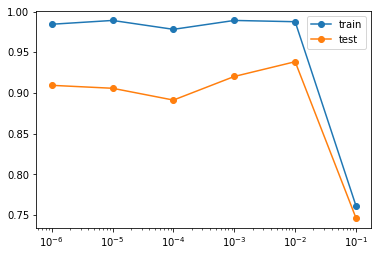

In [319]:
# plot train and test means for grid search
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend()
plt.show()

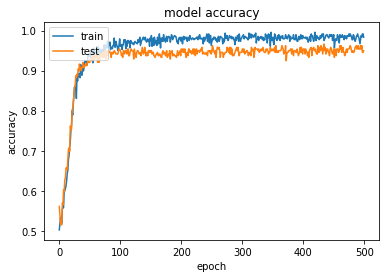

In [341]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

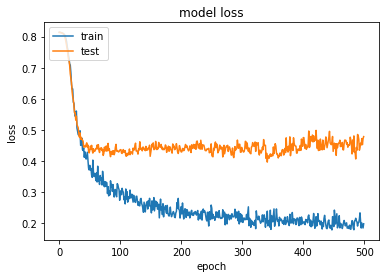

In [342]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [343]:
dataset_test = pd.read_pickle('data_test3.pkl')
data_test = pd.DataFrame(dataset)

In [344]:
data_test = data_test.sample(frac=1)

In [345]:
X_new = data_test.iloc[:,:54]
y_new = data_test.iloc[:,-1]

In [346]:
accuracy_score(y_new,classifier.predict_classes(X_new))

0.9661181026137464